In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud=pd.read_csv('Automobile_fraud.csv')
fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
fraud=fraud.replace('?',np.nan)

In [4]:
fraud.drop(columns=['_c39','policy_number'],inplace=True,axis=1)

In [5]:
fraud.isnull().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses           

In [6]:
for i in fraud.columns:
    if fraud[i].isnull().sum()>1:
        if fraud[i].dtype=='object':
            fraud[i]=fraud[i].fillna(fraud[i].mode()[0])
        else:
            fraud[i]=fraud[i].fillna(fraud[i].mean()[0])

In [7]:
fraud.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

In [8]:
fraud['pcy_day']=pd.to_datetime(fraud['policy_bind_date'],format='%d-%m-%Y').dt.day
fraud['pcy_month']=pd.to_datetime(fraud['policy_bind_date'],format='%d-%m-%Y').dt.month
fraud['pcy_year']=pd.to_datetime(fraud['policy_bind_date'],format='%d-%m-%Y').dt.year
fraud.drop(columns=['policy_bind_date'],axis=1,inplace=True)

In [9]:
m=fraud.dtypes.loc[fraud.dtypes=='object'].index
m

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in m:
    fraud[i]=le.fit_transform(fraud[i])

In [11]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_state                   1000 non-null int32
policy_csl                     1000 non-null int32
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null int32
insured_education_level        1000 non-null int32
insured_occupation             1000 non-null int32
insured_hobbies                1000 non-null int32
insured_relationship           1000 non-null int32
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date                  1000 non-null int32
incident_type                  1000 non-null int32
collision_type           

months_as_customer                AxesSubplot(0.125,0.749828;0.0824468x0.130172)
age                            AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
policy_state                   AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
policy_csl                     AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
policy_deductable              AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
policy_annual_premium          AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
umbrella_limit                 AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
insured_zip                    AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
insured_sex                       AxesSubplot(0.125,0.593621;0.0824468x0.130172)
insured_education_level        AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
insured_occupation             AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
insured_hobbies                AxesSubplot(0.421809,0.593621;0.0824468x0.130172)
insured_relationship        

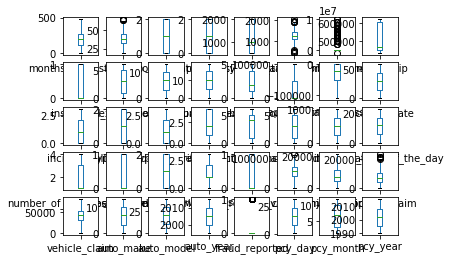

In [12]:
fraud.plot(kind='box',layout=(5,8),subplots=True)

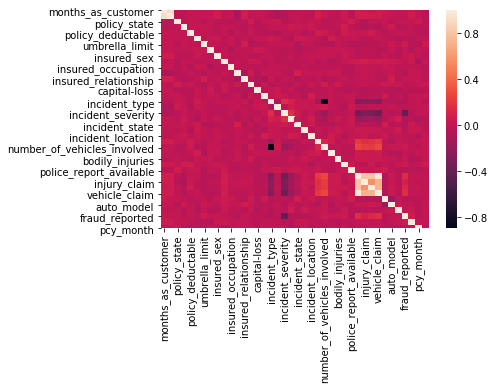

In [13]:
import seaborn as sns
sns.heatmap(fraud.corr())

In [14]:
from scipy.stats import zscore
dt=abs(zscore(fraud))
print(fraud.shape)
fraud_new=fraud.loc[(dt<3).all(axis=1)]
print(fraud_new.shape)

(1000, 40)
(980, 40)


In [15]:
fraud_new.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_date                  0.002604
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725


In [16]:
for i in fraud_new.columns:
    if fraud_new.skew().loc[i]>0.55:
        fraud_new[i]=np.sqrt(fraud_new[i])
        
print(fraud_new.skew())

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.648539
insured_zip                    0.820824
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_date                  0.002604
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725


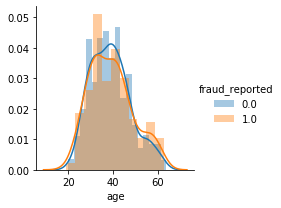

In [17]:
sns.FacetGrid(fraud_new,hue='fraud_reported').map(sns.distplot,'age').add_legend()

The above graph represents that people with age 30 to 50 are more likely to be fraud_reported

In [19]:
x=fraud_new.drop(columns=['fraud_reported','policy_annual_premium','umbrella_limit'])
y=fraud_new['fraud_reported']

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [21]:
def max_r2(reg,x,y):
    maxsrc=0
    for r in range(45,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r)
        reg.fit(x_train,y_train)
        ypred=reg.predict(x_test)
        r2src=r2_score(y_test,ypred)
        if maxsrc<r2src:
            maxsrc=r2src
            final=r
            print("for final state",final,'max r2 score is:',maxsrc)
    print('score of the model:',reg.score(x_train,y_train))
    print('accuracy of the model:',accuracy_score(y_test,ypred))
    print('Confussion matrix:',confusion_matrix(y_test,ypred))
    print('Clasification report:',classification_report(y_test,ypred))

    print('Cross val score:',cross_val_score(reg,x,y,cv=10).mean())
    print('auc_score is :',roc_auc_score(y_test,reg.predict(x_test)))

In [22]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
max_r2(lg,x,y)

score of the model: 0.7687074829931972
accuracy of the model: 0.7428571428571429
Confussion matrix: [[178   1]
 [ 62   4]]
Clasification report:               precision    recall  f1-score   support

         0.0       0.74      0.99      0.85       179
         1.0       0.80      0.06      0.11        66

    accuracy                           0.74       245
   macro avg       0.77      0.53      0.48       245
weighted avg       0.76      0.74      0.65       245

Cross val score: 0.7489795918367347
auc_score is : 0.5275097342136448


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dct=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy']}
clf=GridSearchCV(dct,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'criterion': 'gini'}

In [24]:
dct=DecisionTreeClassifier('gini')
max_r2(dct,x,y)

for final state 47 max r2 score is: 0.01391916820392447
for final state 63 max r2 score is: 0.04792746113989632
score of the model: 1.0
accuracy of the model: 0.7551020408163265
Confussion matrix: [[146  33]
 [ 27  39]]
Clasification report:               precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       179
         1.0       0.54      0.59      0.57        66

    accuracy                           0.76       245
   macro avg       0.69      0.70      0.70       245
weighted avg       0.76      0.76      0.76       245

Cross val score: 0.7724489795918367
auc_score is : 0.7032757745048248


In [25]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
max_r2(kn,x,y)

score of the model: 0.7904761904761904
accuracy of the model: 0.6571428571428571
Confussion matrix: [[158  21]
 [ 63   3]]
Clasification report:               precision    recall  f1-score   support

         0.0       0.71      0.88      0.79       179
         1.0       0.12      0.05      0.07        66

    accuracy                           0.66       245
   macro avg       0.42      0.46      0.43       245
weighted avg       0.56      0.66      0.60       245

Cross val score: 0.6979591836734693
auc_score is : 0.4640680548501777


In [26]:
from sklearn.svm import SVC
svc=SVC()
max_r2(svc,x,y)

score of the model: 1.0
accuracy of the model: 0.7306122448979592
Confussion matrix: [[179   0]
 [ 66   0]]
Clasification report:               precision    recall  f1-score   support

         0.0       0.73      1.00      0.84       179
         1.0       0.00      0.00      0.00        66

    accuracy                           0.73       245
   macro avg       0.37      0.50      0.42       245
weighted avg       0.53      0.73      0.62       245

Cross val score: 0.7551020408163265
auc_score is : 0.5


In [27]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
max_r2(rfr,x,y)

for final state 80 max r2 score is: 0.034263189812007044
score of the model: 0.9850340136054422
accuracy of the model: 0.7510204081632653
Confussion matrix: [[167  12]
 [ 49  17]]
Clasification report:               precision    recall  f1-score   support

         0.0       0.77      0.93      0.85       179
         1.0       0.59      0.26      0.36        66

    accuracy                           0.75       245
   macro avg       0.68      0.60      0.60       245
weighted avg       0.72      0.75      0.71       245

Cross val score: 0.7673469387755102
auc_score is : 0.595268325715253


In [28]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
gbr=GradientBoostingClassifier()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,50,100,1000]}
clf=GridSearchCV(gbr,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [30]:
gbr=GradientBoostingClassifier(learning_rate=0.1,n_estimators=50)
max_r2(gbr,x,y)

for final state 45 max r2 score is: 0.12930563149261887
for final state 52 max r2 score is: 0.20104001410188632
for final state 57 max r2 score is: 0.23860497237569056
for final state 75 max r2 score is: 0.24093311463459077
for final state 76 max r2 score is: 0.2597548342541437
for final state 92 max r2 score is: 0.3800000000000001
score of the model: 0.9482993197278912
accuracy of the model: 0.8489795918367347
Confussion matrix: [[163  16]
 [ 21  45]]
Clasification report:               precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       179
         1.0       0.74      0.68      0.71        66

    accuracy                           0.85       245
   macro avg       0.81      0.80      0.80       245
weighted avg       0.85      0.85      0.85       245

Cross val score: 0.8367346938775511
auc_score is : 0.7962163534789233


In [31]:
adb=AdaBoostClassifier()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,50,100,1000]}
clf=GridSearchCV(adb,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 10}

In [32]:
adb=AdaBoostClassifier(learning_rate=0.001,n_estimators=10)
max_r2(adb,x,y)

for final state 46 max r2 score is: 0.005956491712707179
for final state 47 max r2 score is: 0.17826597350327034
for final state 72 max r2 score is: 0.22648720505151199
score of the model: 0.8149659863945579
accuracy of the model: 0.7918367346938775
Confussion matrix: [[151  28]
 [ 23  43]]
Clasification report:               precision    recall  f1-score   support

         0.0       0.87      0.84      0.86       179
         1.0       0.61      0.65      0.63        66

    accuracy                           0.79       245
   macro avg       0.74      0.75      0.74       245
weighted avg       0.80      0.79      0.79       245

Cross val score: 0.8091836734693878
auc_score is : 0.7475452852547824


In [ ]:
from sklearn.externals import joblib
joblib.dump(gbr,'Automobile_fraud')